In [362]:
import os
import sys
my_path = "/kaggle/input/mlsecu" # path to utils folder
sys.path.append(my_path)
from mlsecu.anomaly_detection_use_case import *
from mlsecu.data_exploration_utils import *
from mlsecu.data_preparation_utils import *
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

### Loading Dataset

For this lab session, you will use the dataset for IEEE CIS Fraud Detection contest 2019 [here](https://www.kaggle.com/c/ieee-fraud-detection/data). The dataset entails user information as well astransaction information, linked together with a TransactionID

In [363]:
TRAIN_TRANSACTION_FILE_PATH = os.path.join('/kaggle/input/ieee-fraud-detection','train_transaction.csv')

**3. Load the CSV files as ‘train_transaction.csv’ using Pandas**

In [364]:
transaction_df = pd.read_csv(TRAIN_TRANSACTION_FILE_PATH)

In [365]:
transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**4. From train_transaction keep 10000 entries: the first 9700 non-fraud entries and the first 300 fraud entries in dataset reduced_transaction_df**

In [366]:
non_fraud_df = transaction_df[transaction_df['isFraud'] == 0][:9700]
fraud_df = transaction_df[transaction_df['isFraud'] == 1][:300]

In [367]:
print(f'{non_fraud_df.shape = }')
non_fraud_df.head()

non_fraud_df.shape = (9700, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [368]:
print(f'{fraud_df.shape = }')
fraud_df.head()

fraud_df.shape = (300, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
203,2987203,1,89760,445.000,W,18268,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,2987243,1,90246,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2987245,1,90295,37.098,C,13413,103.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [369]:
reduced_transaction_df = pd.concat([non_fraud_df, fraud_df], ignore_index=True)
print(f'{reduced_transaction_df.shape = }')


reduced_transaction_df.shape = (10000, 394)


## Data set observation

**5. Print the head of the dataset**

In [370]:
reduced_transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**6. List following information for the training set**

**6.1 get column number**

In [371]:
column_number = len(reduced_transaction_df.columns)
print(f'{column_number=}')


column_number=394


**6.2. Get Column names (all should be visible in a line, not in a column)**

In [372]:
column_names = list(reduced_transaction_df.columns)
print("column_names")
for col in column_names:
    print(col,end = "\t")

column_names
TransactionID	isFraud	TransactionDT	TransactionAmt	ProductCD	card1	card2	card3	card4	card5	card6	addr1	addr2	dist1	dist2	P_emaildomain	R_emaildomain	C1	C2	C3	C4	C5	C6	C7	C8	C9	C10	C11	C12	C13	C14	D1	D2	D3	D4	D5	D6	D7	D8	D9	D10	D11	D12	D13	D14	D15	M1	M2	M3	M4	M5	M6	M7	M8	M9	V1	V2	V3	V4	V5	V6	V7	V8	V9	V10	V11	V12	V13	V14	V15	V16	V17	V18	V19	V20	V21	V22	V23	V24	V25	V26	V27	V28	V29	V30	V31	V32	V33	V34	V35	V36	V37	V38	V39	V40	V41	V42	V43	V44	V45	V46	V47	V48	V49	V50	V51	V52	V53	V54	V55	V56	V57	V58	V59	V60	V61	V62	V63	V64	V65	V66	V67	V68	V69	V70	V71	V72	V73	V74	V75	V76	V77	V78	V79	V80	V81	V82	V83	V84	V85	V86	V87	V88	V89	V90	V91	V92	V93	V94	V95	V96	V97	V98	V99	V100	V101	V102	V103	V104	V105	V106	V107	V108	V109	V110	V111	V112	V113	V114	V115	V116	V117	V118	V119	V120	V121	V122	V123	V124	V125	V126	V127	V128	V129	V130	V131	V132	V133	V134	V135	V136	V137	V138	V139	V140	V141	V142	V143	V144	V145	V146	V147	V148	V149	V150	V151	V152	V153	V154	V155	V156	V157	V158	V159	V160	V161	V162	V163	V164	V

**6.3. Get length of the data set**

In [373]:
dataset_length = len(reduced_transaction_df)
print(f'{dataset_length=}')

dataset_length=10000


**6.4. For each column name, its type (show all values)**

In [374]:
print("column_names and their types")
for col in column_names:
    types = reduced_transaction_df[col].dtypes
    print(col,'has type',types,end = "\t")

column_names and their types
TransactionID has type int64	isFraud has type int64	TransactionDT has type int64	TransactionAmt has type float64	ProductCD has type object	card1 has type int64	card2 has type float64	card3 has type float64	card4 has type object	card5 has type float64	card6 has type object	addr1 has type float64	addr2 has type float64	dist1 has type float64	dist2 has type float64	P_emaildomain has type object	R_emaildomain has type object	C1 has type float64	C2 has type float64	C3 has type float64	C4 has type float64	C5 has type float64	C6 has type float64	C7 has type float64	C8 has type float64	C9 has type float64	C10 has type float64	C11 has type float64	C12 has type float64	C13 has type float64	C14 has type float64	D1 has type float64	D2 has type float64	D3 has type float64	D4 has type float64	D5 has type float64	D6 has type float64	D7 has type float64	D8 has type float64	D9 has type float64	D10 has type float64	D11 has type float64	D12 has type float64	D13 has type float

**7. Control the correct extraction of transaction: number of non-fraudulent transactions, number of fraudulent transactions, rate of fraudulent transactions**

In [375]:
non_fradulent_number = len(reduced_transaction_df[reduced_transaction_df['isFraud'] == 0])
fradulent_number = len(reduced_transaction_df[reduced_transaction_df['isFraud'] == 1])
fraudulent_rate = fradulent_number /(fradulent_number+non_fradulent_number)
print(f'Number of  non-frauds {non_fradulent_number}')
print(f'Number of frauds {fradulent_number}')
print(f'Fraud rate {fraudulent_rate}')

Number of  non-frauds 9700
Number of frauds 300
Fraud rate 0.03


**8. Which columns are categories? List them (show all column names); extract and show existing values.**

In [376]:
categorical_columns = ['ProductCD', 'card1', 'card2', 'card3','card4','card5','card6',
                       'addr1', 'addr2',
                       'P_emaildomain','R_emaildomain', 'M1','M2', 'M3', 'M4','M5', 'M6', 'M7', 'M8', 'M9']
print(f'{categorical_columns  =  }')

categorical_columns  =  ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


In [377]:
reduced_transaction_df[categorical_columns].head()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**9. Which columns are numeric? List them (show all column names); extract and show min, max,mean, median and standard deviation values.**

In [378]:
is_num = lambda type_ : pd.api.types.is_numeric_dtype(type_)
numeric_columns = []
for col in column_names:
    if is_num(reduced_transaction_df[col].dtypes):
        numeric_columns.append(col)

print("Numeric columns are", numeric_columns)

Numeric columns are ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V9

**10. For each column, print the rate of undefined values (NaN for numeric)**

In [379]:
undefined_rates = reduced_transaction_df.isna().mean()

# Printing the rate of undefined values for each column
for col,rate in zip(reduced_transaction_df.columns,undefined_rates):
    print(col,rate, end='\t')

TransactionID 0.0	isFraud 0.0	TransactionDT 0.0	TransactionAmt 0.0	ProductCD 0.0	card1 0.0	card2 0.0121	card3 0.0001	card4 0.0001	card5 0.0023	card6 0.0001	addr1 0.0915	addr2 0.0915	dist1 0.6618	dist2 0.9625	P_emaildomain 0.2099	R_emaildomain 0.8366	C1 0.0	C2 0.0	C3 0.0	C4 0.0	C5 0.0	C6 0.0	C7 0.0	C8 0.0	C9 0.0	C10 0.0	C11 0.0	C12 0.0	C13 0.0	C14 0.0	D1 0.0	D2 0.4585	D3 0.4283	D4 0.6232	D5 0.7234	D6 0.9507	D7 0.9775	D8 0.8898	D9 0.8898	D10 0.1268	D11 0.7732	D12 0.9593	D13 0.972	D14 0.9544	D15 0.494	M1 0.5794	M2 0.5794	M3 0.5794	M4 0.4879	M5 0.5788	M6 0.2579	M7 0.7868	M8 0.7868	M9 0.7868	V1 0.7732	V2 0.7732	V3 0.7732	V4 0.7732	V5 0.7732	V6 0.7732	V7 0.7732	V8 0.7732	V9 0.7732	V10 0.7732	V11 0.7732	V12 0.1269	V13 0.1269	V14 0.1269	V15 0.1269	V16 0.1269	V17 0.1269	V18 0.1269	V19 0.1269	V20 0.1269	V21 0.1269	V22 0.1269	V23 0.1269	V24 0.1269	V25 0.1269	V26 0.1269	V27 0.1269	V28 0.1269	V29 0.1269	V30 0.1269	V31 0.1269	V32 0.1269	V33 0.1269	V34 0.1269	V35 0.6232	V36 0.6232	V37 0.6232	V38 0.62

**11. For each numerical column, print the rate of zero (0) value**

In [380]:
zero_rates = (reduced_transaction_df == 0).mean()
for col,rate in zip(reduced_transaction_df.columns,zero_rates):
    print(col,rate, end='\t')


TransactionID 0.0	isFraud 0.97	TransactionDT 0.0	TransactionAmt 0.0	ProductCD 0.0	card1 0.0	card2 0.0	card3 0.0	card4 0.0	card5 0.0	card6 0.0	addr1 0.0	addr2 0.0	dist1 0.0313	dist2 0.0036	P_emaildomain 0.0	R_emaildomain 0.0	C1 0.0007	C2 0.0003	C3 0.991	C4 0.8347	C5 0.6029	C6 0.1013	C7 0.9094	C8 0.7806	C9 0.2987	C10 0.7899	C11 0.0005	C12 0.9087	C13 0.0497	C14 0.0503	D1 0.4531	D2 0.0221	D3 0.1317	D4 0.1105	D5 0.0492	D6 0.0315	D7 0.0073	D8 0.0015	D9 0.0075	D10 0.3396	D11 0.0667	D12 0.0275	D13 0.0231	D14 0.0347	D15 0.1184	M1 0.0	M2 0.0	M3 0.0	M4 0.0	M5 0.0	M6 0.0	M7 0.0	M8 0.0	M9 0.0	V1 0.0004	V2 0.0004	V3 0.0004	V4 0.0552	V5 0.0529	V6 0.0004	V7 0.0004	V8 0.0004	V9 0.0004	V10 0.1105	V11 0.1099	V12 0.524	V13 0.4998	V14 0.0002	V15 0.8385	V16 0.8385	V17 0.8364	V18 0.8364	V19 0.3874	V20 0.3797	V21 0.8369	V22 0.8369	V23 0.0005	V24 0.0005	V25 0.2209	V26 0.2205	V27 0.8718	V28 0.8718	V29 0.5782	V30 0.5763	V31 0.8304	V32 0.8304	V33 0.8385	V34 0.8385	V35 0.1991	V36 0.1883	V37 0.0006	V38 0.0006	V39 0

## DataSet visualisation

**12. Visualise the dataset using dimensions: `'TransactionAmt'`, `'card1'`,`'addr1'`**

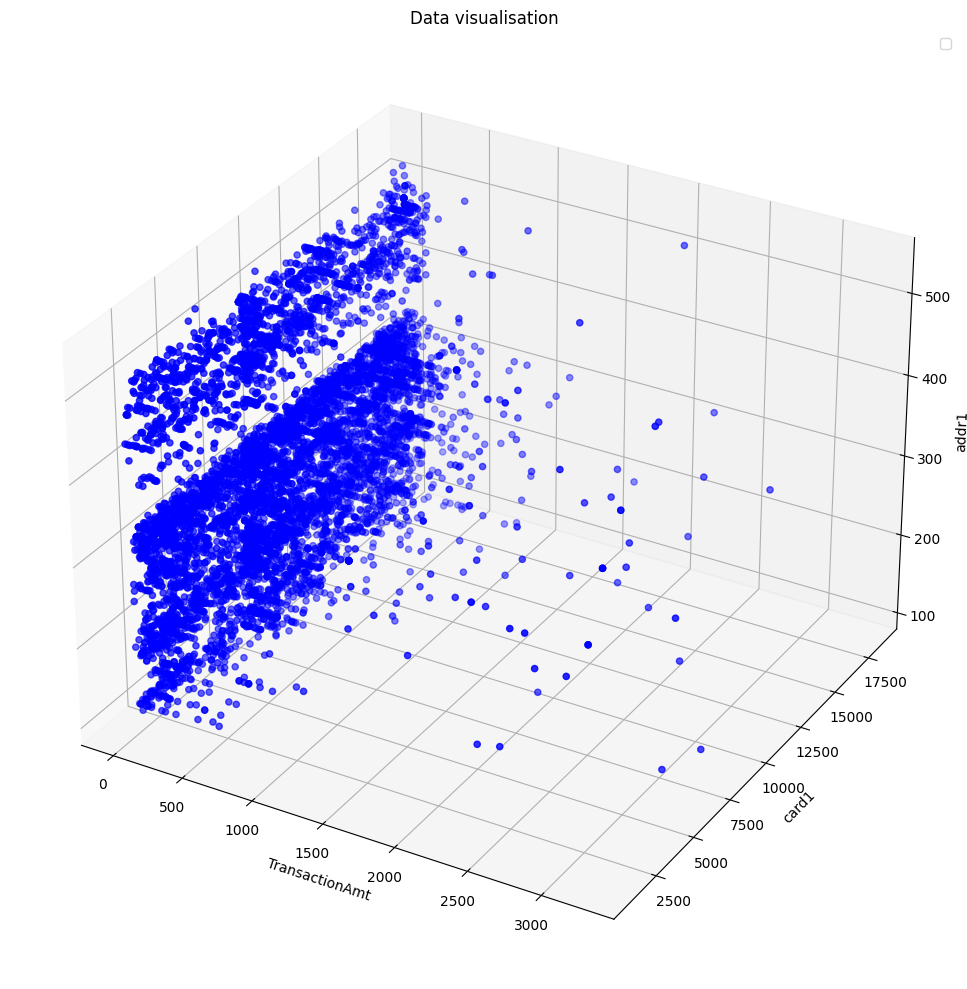

In [381]:

def show3D_transation_data(transac_dataset, x_axis_name, y_axis_name, z_axis_name,title='Data visualisation',color='blue',label=None):
    fig = plt.figure(figsize=(10,10))
    fig.set_facecolor('white')
    ax = fig.add_subplot(1,1,1, projection='3d')

    # Utilisez scatter pour créer le nuage de points en 3D
    ax.scatter(transac_dataset[x_axis_name], transac_dataset[y_axis_name], transac_dataset[z_axis_name],color=color,label=label)

    # Définissez les étiquettes des axes
    ax.set_xlabel(x_axis_name)
    ax.set_ylabel(y_axis_name)
    ax.set_zlabel(z_axis_name)
    ax.legend()
    ax.set_title(title)
    plt.tight_layout()
    plt.show()
    return
show3D_transation_data(reduced_transaction_df,'TransactionAmt', 'card1','addr1')

**13. Create an alternate visualisation function for visualising fraud entries only, in red**

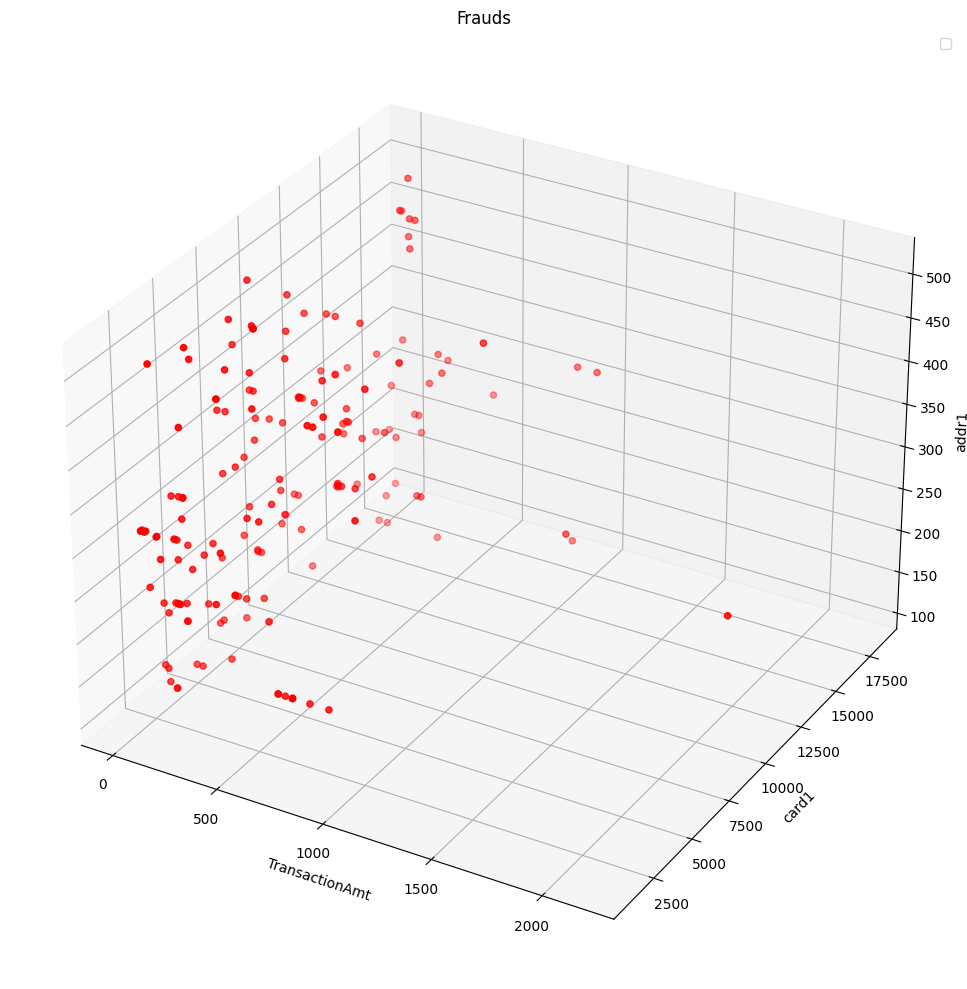

In [382]:
def show3D_transation_data_fraud_only(transac_dataset, x_axis_name, y_axis_name, z_axis_name):
    show3D_transation_data(transac_dataset[transac_dataset['isFraud'] ==1 ],'TransactionAmt', 'card1','addr1',title='Frauds',color='red')
    
show3D_transation_data_fraud_only(reduced_transaction_df,'TransactionAmt', 'card1','addr1')

## Data Cleaning

**14. Perform one-hot encoding of categorical data**

In [383]:
print(f'{reduced_transaction_df[categorical_columns].shape = }')
one_hot_df = get_one_hot_encoded_dataframe(reduced_transaction_df[categorical_columns]) 
print(f'{one_hot_df.shape = }')
one_hot_df.head()

reduced_transaction_df[categorical_columns].shape = (10000, 20)
one_hot_df.shape = (10000, 122)


,card1,card2,card3,card5,addr1,addr2,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,...,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,13926,NaN,150.0,142.0,315.0,87.0,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
1,2755,404.0,150.0,102.0,325.0,87.0,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,4663,490.0,150.0,166.0,330.0,87.0,False,False,False,False,...,True,False,True,False,True,False,True,False,True,False
3,18132,567.0,150.0,117.0,476.0,87.0,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
4,4497,514.0,150.0,102.0,420.0,87.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


**15. Remove NaN (Not a number) values by imputation of the mean of the column**
- Do not forget to transform the resulting data structure in Pandas Dataframe again
- Do not forget to keep the column names for the Dataframe

In [384]:
transformed_df = remove_nan_through_mean_imputation(one_hot_df)
print(f'{transformed_df.shape = }')
transformed_df.head()

transformed_df.shape = (10000, 122)


,card1,card2,card3,card5,addr1,addr2,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,...,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,13926,349.298006,150.0,142.0,315.0,87.0,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
1,2755,404.000000,150.0,102.0,325.0,87.0,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,4663,490.000000,150.0,166.0,330.0,87.0,False,False,False,False,...,True,False,True,False,True,False,True,False,True,False
3,18132,567.000000,150.0,117.0,476.0,87.0,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
4,4497,514.000000,150.0,102.0,420.0,87.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [385]:
def generate_transformed_df(dataframe: pd.DataFrame,selected_cols:list[str]):
    one_hot_df = get_one_hot_encoded_dataframe(reduced_transaction_df[selected_cols])
    transformed_df = remove_nan_through_mean_imputation(one_hot_df)
    return transformed_df

**16. Control that no NaN value remain in the dataframe**

In [386]:
if np.all(transformed_df.isna().mean() == 0):
    print("No more Nan value in the data frame")

No more Nan value in the data frame


## Outlier detection

**17. Extract outliers using sklearn.ensemble.IsolationForests, using and outliers_fraction = 0.03. Control the numbers of outliers.**
*Typs:*
- clf.predict() returns outliers marked as -1
- Add an additional column ‘outliers’ to your dataframe as follows to store outlier status:
- How many outliers found in unsupervised manner are labelled as fraudulent transactions (`isFraud`) ?
- Print fraudulent outliers. What do you observe?

How many outliers found in unsupervised manner are labelled as fraudulent transactions (`isFraud`) ?

Here we will use `get_list_of_if_outliers` which applies the step **14** and **15** to our `reduced_transaction_df` 

In [387]:
outliers_indexes = get_list_of_if_outliers(reduced_transaction_df[categorical_columns],outlier_fraction=0.03)
outliers = np.ones(len(reduced_transaction_df))
outliers[outliers_indexes] = -1
reduced_transaction_df['outliers'] = outliers

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [388]:
fraudulent_outliers = reduced_transaction_df[(reduced_transaction_df['outliers']== -1) & (reduced_transaction_df['isFraud']== 1)]
outliers_matches = len(fraudulent_outliers)
print(f'{outliers_matches} outliers found in unsupervised manner are labelled as fraudulent transactions')

15 outliers found in unsupervised manner are labelled as fraudulent transactions


- **Print fraudulent outliers. What do you observe?**

In [389]:
fraudulent_outliers

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,outliers
9704,2987288,1,90986,155.521,C,16578,545.0,185.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
9721,2988173,1,125295,97.000,W,1191,555.0,191.0,visa,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
9767,2990644,1,157520,14.260,C,16062,500.0,185.0,mastercard,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
9768,2990669,1,157735,14.260,C,16062,500.0,185.0,mastercard,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
9792,2991308,1,164210,46.765,C,7585,553.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
9818,2992358,1,175544,23.866,C,9026,545.0,185.0,visa,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
9859,2993431,1,223619,200.000,W,16075,514.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
9860,2993443,1,223832,226.000,W,16075,514.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
9861,2993510,1,225552,59.000,W,1342,514.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
9863,2993583,1,226938,151.000,W,15066,170.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


We can observe that fraudulent outliers are not well detected.

**18. Create yet another visualisation function for visualising IsolationForest outliers entries only, in red**
`show3D_transation_data_if_outliers_only(transac_dataset, x_axis_name, y_axis_name,z_axis_name)`

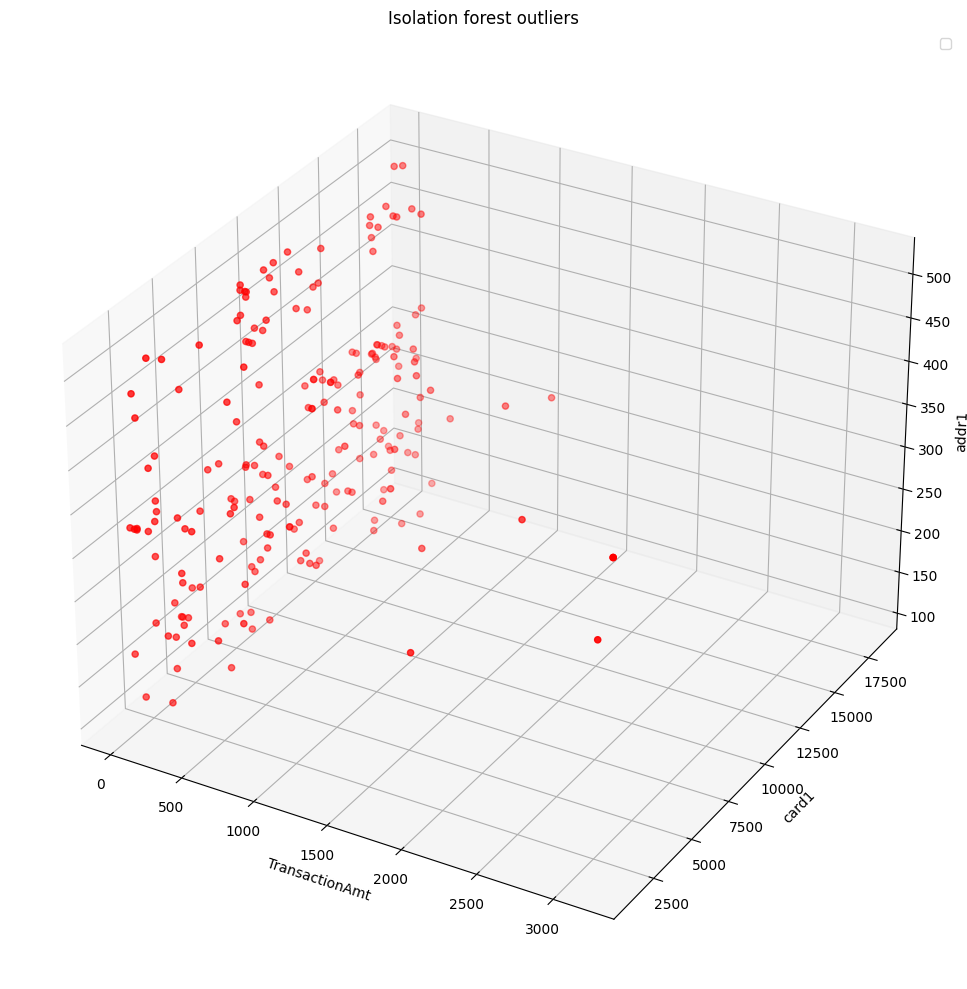

In [390]:
def show3D_transation_data_if_outliers_only(transac_dataset, x_axis_name, y_axis_name,z_axis_name):
    show3D_transation_data(transac_dataset, x_axis_name, y_axis_name, z_axis_name,title='Isolation forest outliers',color='red')
sub_df = reduced_transaction_df[reduced_transaction_df['outliers']== -1]
show3D_transation_data_if_outliers_only(sub_df,'TransactionAmt', 'card1','addr1')

## Local Outlier Factor (LOF)

**19. Extract outliers using sklearn.neighbors. LocalOutlierFactor, using and outliers_fraction = 0.03. Control the numbers of outliers.**


**`clf.predict()` returns outliers marked as -1**
- **Add an additional column ‘lof_outliers’ to your dataframe as follows to store outlier status:**
- **How many outliers found in unsupervised manner are labelled as fraudulent transactions ('isFraud') ?**

In [391]:
outliers_indexes = get_list_of_lof_outliers(reduced_transaction_df[categorical_columns],outlier_fraction =0.03)
reduced_transaction_df['lof_outliers'] = np.ones(len(reduced_transaction_df))
reduced_transaction_df['lof_outliers'][outliers_indexes] = -1 

/tmp/ipykernel_32/1821459994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_transaction_df['lof_outliers'][outliers_indexes] = -1


In [392]:
lof_outliers_matches = len(reduced_transaction_df[(reduced_transaction_df['lof_outliers']== -1) & (reduced_transaction_df['isFraud']== 1)])
print(f'{lof_outliers_matches} lof outliers found in unsupervised manner are labelled as fraudulent transactions')

6 lof outliers found in unsupervised manner are labelled as fraudulent transactions


**20. Create yet another visualisation function for visualising LOF outliers entries only, in red `show3D_transation_data_lof_outliers_only(transac_dataset, x_axis_name, y_axis_name,z_axis_name)`**



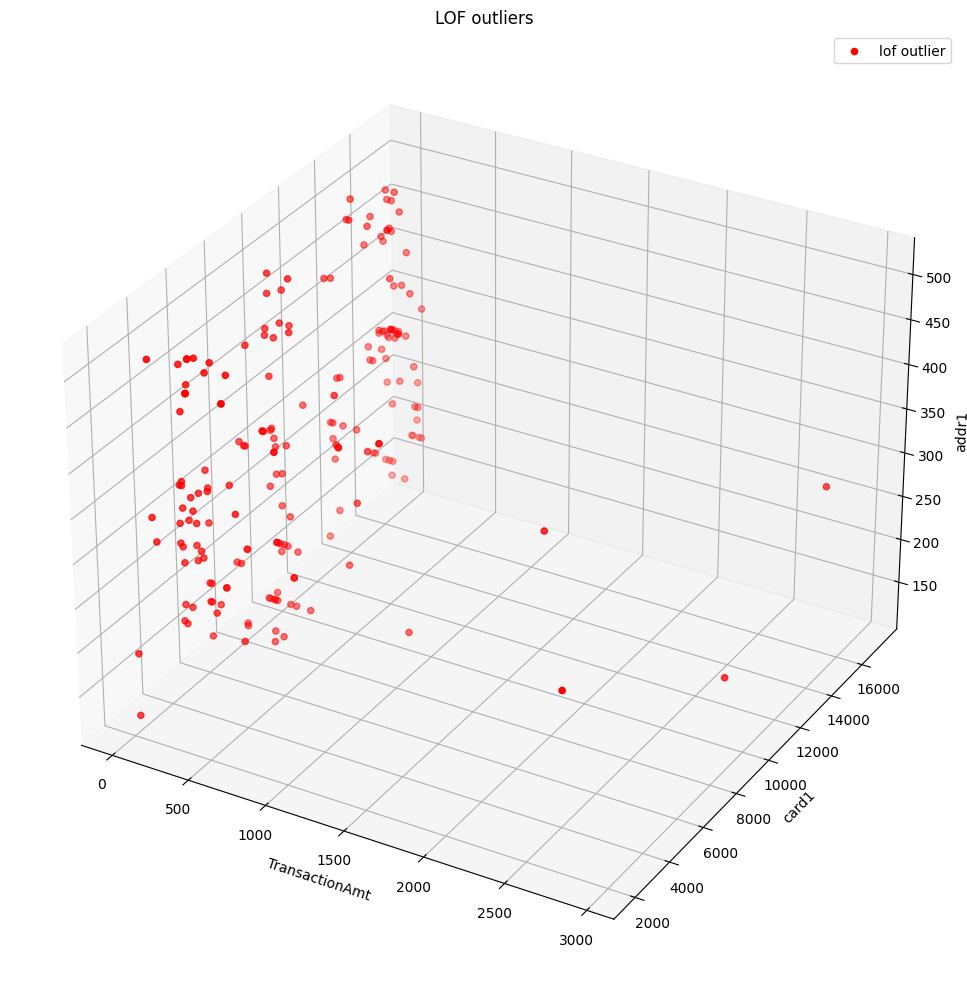

In [393]:
def show3D_transation_data_lof_outliers_only(transac_dataset, x_axis_name, y_axis_name,z_axis_name):
    return show3D_transation_data(transac_dataset, x_axis_name, y_axis_name, z_axis_name,title='LOF outliers',color='red',label='lof outlier')
sub_df = reduced_transaction_df[reduced_transaction_df['lof_outliers']== -1]
show3D_transation_data_lof_outliers_only(sub_df,'TransactionAmt', 'card1','addr1')

**21. Control the complementarity between the 2 algorithms** <br>
    **21.1. How many outliers are common to IsolationForest and LOF?** <br>
    **21.2. What do you deduce for building unsupervised outlier detectors?**

In [394]:
outliers_mask = (reduced_transaction_df['lof_outliers']== -1) & (reduced_transaction_df['outliers']== -1)
common_outliers = len(reduced_transaction_df[outliers_mask])
common_fraud_outliers = len(reduced_transaction_df[outliers_mask & (reduced_transaction_df['isFraud'] == 1)])
print(f'Ther are {common_outliers} common outliers between LOF and IF and {common_fraud_outliers} of those are real frauds')

Ther are 26 common outliers between LOF and IF and 0 of those are real frauds


**21.2. What do you deduce for building unsupervised outlier detectors?**

Builind outliers detectors doesn't seem to be quite efficient for fraud detection.